# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

Zoe Gates (gzp2eu)

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/gatesz33/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv',low_memory=False)
df.head(20) #Reading the airbnb_hw.csv file into jupyter notebook environment using Pandas

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


In [5]:
print(df['Price'].unique(),'\n') #Looking at all of the values in the Price column to get a sense of how it should be cleaned/approached

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

In [6]:
df['Price'].isnull().values.any() #checking for any missing values

False

In [7]:
df['Price']=df['Price'].str.replace(",", "") #deleting the commas for values above 999

In [8]:
print(df['Price'].value_counts(),'\n') #taking a look at the Price data after cleaning, they are strings here

Price
150     1481
100     1207
200     1059
125      889
75       873
        ... 
840        1
306        1
2695       1
2520       1
291        1
Name: count, Length: 511, dtype: int64 



In [9]:
pd.to_numeric(df['Price']) #casting the string values to numeric in order to be able to engage in further statistical analysis

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: int64

summary: I ended up with no missing values, and then I realized that after 999 the values accrued a comma, so I cleansed that out in order to eventually cast to numeric.

In [11]:
df_police = pd.read_csv('https://raw.githubusercontent.com/ds4e/wrangling/main/assignment/data/mn_police_use_of_force.csv')
df_police.head() #Reading the Use of Police force dataset into my Python environment

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [12]:
df_police['subject_injury'].value_counts(dropna=False) #used this to check the unique values in the data sets, I added in dropna=False to view missing values

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [13]:
df_police['subject_injury']= df_police['subject_injury'].fillna('Unreported') #Imputing missing values to read as 'Unreported' instead of just existing as nans
df_police['subject_injury'].value_counts()

subject_injury
Unreported    9848
Yes           1631
No            1446
Name: count, dtype: int64

In [14]:
9848/(9848+1631+1446) * 100 #Finding the percent of subject injuries that go unreported by looking at the value counts and dividing unreported cases by total cases

76.19342359767892

According to my calculations above, nans, which I renamed "Unreported", make up 76% of the data. This is a high amount of non-response, but it's actually not surprising. I think that getting data on arrests is very difficult, and could require a lot of further investigation. I don't think it's a concern, I think it's non-response or just lack of information about each arrest. 

In [16]:
pd.crosstab(df_police['subject_injury'], df_police['force_type'] ) #performing the cross tabulation between the two variables to examine relationships

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Unreported,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


It seems like the most data we have are on arrest cases involving bodily force. In this case, there seemed to be about a 50% rate of injury. There are also a significant amount of cases involving gun point display in tasers. More people were injured, rather than not, when the arrests involved these force types, except for firearms. When there is a force type listed, the arrest is likely to involve bodily harm.

In [18]:
pd.crosstab(df_police['subject_injury'] == 'Unreported', df_police['force_type']) #Examining the missing values regarding whether there was an injury against force type to examine possible patterns

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
False,2,2379,172,2,77,74,0,3,0,46,322
True,2,7051,1421,0,27,74,87,0,170,31,985


Most injuries during arrest that are not reported involved the use of bodily force, chemical, irritants and tasers. I think this is really interesting to see, for the missing values could indicate a lack of reporting on the side of the police. This is especially important to analyze as more information surfaces regarding police brutality. It could speak volumes for the research that is being done on oppression of marginalized groups in instances of arrest.

In [20]:
df_justice= pd.read_parquet("https://github.com/ds4e/wrangling/raw/refs/heads/main/assignment/data/justice_data.parquet")
df_justice.head() #Reading in the justice data, it's too large to be read in as a csv, so it's been transformed into a parquet file for us

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [21]:
print(df_justice['WhetherDefendantWasReleasedPretrial'].value_counts(),'\n') #Looking at the data in the column to determine what cleaning to do
df_justice['WhetherDefendantWasReleasedPretrial'].isna().sum() #Checking if there are any missing values beyond those coded to 9

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 



0

In [22]:
df_justice['WhetherDefendantWasReleasedPretrial'] = df_justice['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan) 
#Casting the missing values that are marked as 9 to nans

In [23]:
df_justice['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False) #Verifying that this went through

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64

In [24]:
df_justice['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts()

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64

In [25]:
df_justice['ImposedSentenceAllChargeInContactEvent'].unique() #Looking at the codebook we see that this is the sentence measured in months

array([' ', '60', '12', '.985626283367556', '36', '6', '24',
       '5.91375770020534', '120', '72', '11.9917864476386', '0',
       '2.95687885010267', '84', '108', '300', '240', '180', '4', '96',
       '2', '54', '.328542094455852', '44', '5', '115', '132', '48',
       '258', '34', '76', '.164271047227926', '.131416837782341', '111',
       '9', '3', '1.97125256673511', '36.9856262833676',
       '.0657084188911704', '35.4928131416838', '106.492813141684', '8',
       '35', '18.3141683778234', '480', '32', '93', '234', '732',
       '1.16427104722793', '4.6570841889117', '21', '7',
       '4.49281314168378', '18', '600', '43.1642710472279', '179', '52',
       '30', '20', '192', '702', '14', '55', '53', '11.9055441478439',
       '114', '35.0061601642711', '68', '.657084188911704',
       '46.6242299794661', '102', '65', '200', '57', '24.3285420944559',
       '12.1642710472279', '117', '81.4928131416838', '22.4928131416838',
       '1980', '3.6570841889117', '56', '10', '2.7926078

In [26]:
df_justice['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df_justice['ImposedSentenceAllChargeInContactEvent'], errors='coerce') #Casting the data to numeric, ensuring we are working with intergers and floats
df_justice['ImposedSentenceAllChargeInContactEvent'] = df_justice['ImposedSentenceAllChargeInContactEvent'].round() #Rounding to the nearest whole number because the variable involves months, so it's unhelpful to have a bunch of trailing decimals
df_justice['ImposedSentenceAllChargeInContactEvent']= df_justice['ImposedSentenceAllChargeInContactEvent'].replace(np.nan,'No Data') #Replacing nans with "No Data" in order to not loose information regarding other variables
df_justice['ImposedSentenceAllChargeInContactEvent'].value_counts()

ImposedSentenceAllChargeInContactEvent
No Data    9053
0.0        5702
12.0       1720
1.0        1130
3.0         905
           ... 
518.0         1
74.0          1
207.0         1
92.0          1
116.0         1
Name: count, Length: 234, dtype: int64

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

### Answer
1. This paper is about tidy data and common tools that can be used to clean large and messy data sets. I think it will address thing sthat can be used to streamline the tedious proccess of data cleaning. It may address tools that could be used universally to get started across different datasets.
2. The tidy data standard makes cleaning easier and allows people to engage with and explore data more easily. It allows for the creation of data cleaning tools as well. This is especially helpful when dealing with real-life data.
3. Tidy datasets present a sort of standardized structure that is true across all sets. At the same time, they aren't not entirely clean. From what I understand, tidy data is an initial step to exploration. It makes cleaning easier, but being tidy doesn't mean the data is clean. Therefore, once the data is tidy, steps are subjective to the dataset we are working with.
4. Values are defined as numbers and strings that make up a dataset. Variables are the element in common being measured, the independent variable. Observations are the rest of the attributes being measured on that specific variable, they are "values measured on the same unit."
5. In tidy data sets each variable creates a column, each observation maps a row, and the observational unit types make up a table.
6. Column headers are values and not variable names, multiple variables are being store in one column (should be one variable per column), variables are stored in columns and rows (they should be mapping columns), multiple types of different observational units are being stored in the same table, and conversely, a single observational unit being stored across multiple tables. Table 4 is a tabular dataset, it's columns are headed by values not variable names and variables are forming both the rows and the columns. Melting a dataset is turning columns into rows since they are formed by variables and not observations. Frequency is being determined by religion and income here. We want to be able to observe these separately across columns mapped to the specific variables. So, we stack the columns on top of each other to create rows (values are stack on top of each other and other variables are repeated when needed according to toy dataset).
7. Table 11 is tabular, with a column for each day in the month. When the data is tidied this is stacked into a date column, and then the data is moltened so that tmax and tmin are also columns of their own, that relate to the date based on their rows/observations.
8. The "chicken-egg problem" refers to the tools that are used with tidy data and the tidy data itself. Tidy data is not as helpful without the tools that work with it, and the tools cannot be used without tidy data. These things are mutuallly dependent. There is not much wiggle room with this tidy standard for anything to further change.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [124]:
pip install xlrd 

Note: you may need to restart the kernel to use updated packages.


In [126]:
#Installing the engine needed to read this old version of an excel file, https://xlrd.readthedocs.io/en/latest/

In [128]:
df_shark= pd.read_excel('C:/Users/gates/Downloads/GSAF5.xls', engine='xlrd') #Reading in the shark attack excel file

In [130]:
df_shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print(df_shark.isna().sum()) #checking counts of nans in each column of the data frame
len(df_shark) #counting the total number of rows

Date                 0
Year                 2
Type                18
Country             50
State              482
Location           565
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3132
Source              19
pdf                193
href formula       198
href               196
Case Number        194
Case Number.1      195
original order     193
Unnamed: 21       6991
Unnamed: 22       6990
dtype: int64


6992

In [34]:
df_shark= df_shark.drop(columns=['Unnamed: 21', 'Unnamed: 22']) #Dropping the columns with nans equaling or reaching that of the total length of the data frame, meaning there is no data in these columns

In [35]:
df_shark['Year'] = pd.to_numeric(df_shark['Year'], errors='coerce') #Casting the Year data to numeric, this makes it easier to work with and conduct analysis
df_shark[df_shark['Year'] == 0] #Understanding what year 0 means, we see it's being used as a placeholder for all BC values
df_shark['Year']= df_shark['Year'].replace(0,np.nan) #Replacing the place holder 0 with a missing value, depending on the analysis we are conducting there are different ways to handle this. I made the data integers, but if I were to make them objects I could put 'B.C.'

In [36]:
df_shark['Year'].value_counts()

Year
2015.0    143
2017.0    140
2016.0    131
2011.0    128
2014.0    126
         ... 
1786.0      1
1785.0      1
1784.0      1
1783.0      1
5.0         1
Name: count, Length: 260, dtype: int64

In [37]:
df_shark.describe() #Making sure the missing values were added in place of the 0 placeholder (this placeholder could create a lot of issues and biases in statistical analysis)

,Year,original order
count,6861.000000,6799.000000
mean,1971.400670,3401.152081
std,60.721007,1963.076319
min,5.000000,2.000000
25%,1950.000000,1701.500000
50%,1987.000000,3401.000000
75%,2010.000000,5100.500000
max,2026.000000,6802.000000


#### Description
After cleaning the data and changing the type of variable we see in the year column from float to integer, we see that the values of the years range from 5 AD to 2026.

Text(0.5, 1.0, 'Shark Attacks by Year')

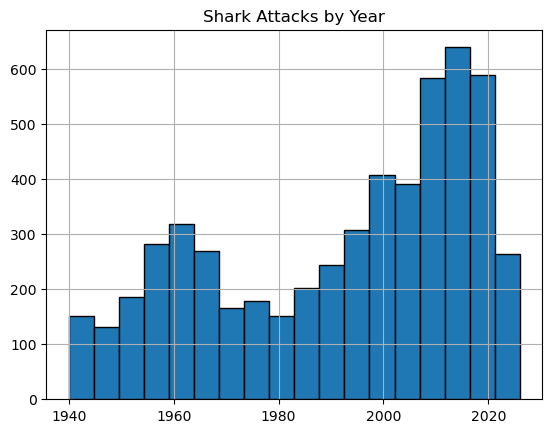

In [39]:
df_filtered = df_shark[df_shark['Year'] >= 1940] #Filtering the shark dataframe to include only attacks in and after 1940
df_filtered['Year'].hist(bins=18, edgecolor='Black') #Changing the aesthetics of the bins so that they are easier to view
plt.title('Shark Attacks by Year') #Adding a title

#### Answer
It seems the number of shark attacks has increased from 1940 onward.

In [41]:
df_shark['Age'].value_counts() #Looking at the age column
df_shark['Age'] = pd.to_numeric(df_shark['Age'], errors='coerce') #Casting this variable to numeric to eventually create a histogram
df_hist_age= df_shark['Age'].dropna() #Creating a new dataframe where the nans are dropped, this will preserve data in my original df_shark df (as floats)
df_shark['Age'].unique()

array([12., 37., 23., 40., 28., 69., 48., nan, 57., 24., 45., 61., 27.,
       38., 16., 33., 30., 15., 41., 14., 26., 18., 21., 49., 25., 46.,
       19., 20., 65., 64., 13., 11., 32., 29., 10., 62., 39., 22., 66.,
       52., 44., 47., 55., 59.,  8., 50., 34.,  9., 35., 77., 60., 42.,
       73., 58., 67., 17.,  6., 53., 68., 43., 51., 31., 56., 36.,  7.,
       71., 54., 75., 70.,  4., 63., 74.,  3., 82., 72.,  5., 86., 84.,
       87.,  1., 81., 78.])

Text(0.5, 1.0, 'Shark Attack Victim Ages')

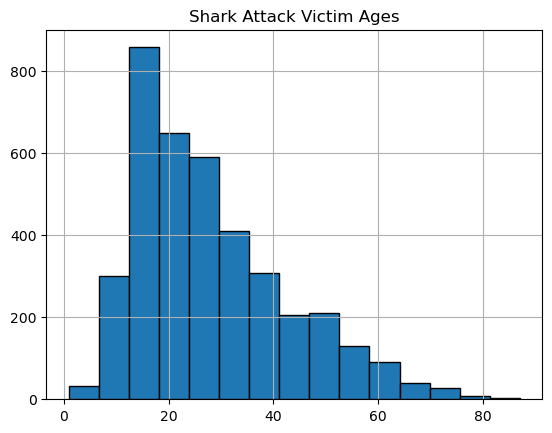

In [42]:
df_hist_age.hist(bins=15, edgecolor='Black')
plt.title('Shark Attack Victim Ages')

In [43]:
df_shark['Sex'].unique() #Looking at all of the values in this column to examine how to clean
df_shark['Sex']= df_shark['Sex'].replace([' M','M ','M x 2'],'M') #replacing weirdly spaced 'Ms' previously observed with 'M'
df_shark['Sex']= df_shark['Sex'].replace([np.nan,'lli', '.','N'],'Unknown') #replacing missing and odd values with 'Unknown'

In [44]:
df_shark['Sex'].value_counts() #Making sure the replacements were successful

Sex
M          5617
F           792
Unknown     583
Name: count, dtype: int64

In [45]:
df_m_shark = df_shark[df_shark['Sex'] == 'M'] #Filtering males from the dataframe
print(len(df_m_shark)/len(df_shark)) #Dividing male cases by total cases based on the number of total rows (includes, unknowns, males, females) to find proportion of male shark attacks

0.8033466819221968


0.8033 of shark attacks happen to males!

In [47]:
df_shark['Type'].unique() #Looking at values in the Type column
df_shark['Type']= df_shark['Type'].replace(['Questionable', 'Watercraft','Sea Disaster', '?','Invalid', 'Under investigation','Unconfirmed','Unverified','Boat'], 'Unknown') #Replacing anything that isn't provoked or unprovoked with unknown
df_shark['Type']= df_shark['Type'].replace(' Provoked','Provoked')

In [48]:
df_shark['Type'].value_counts() #Checking values after this cleaning

Type
Unprovoked    5153
Unknown       1182
Provoked       639
Name: count, dtype: int64

In [49]:
df_shark['Type'].value_counts(dropna=False) #Looking for nans
df_shark['Type'] = df_shark['Type'].fillna('Unknown') #Imputing 'Unknown' to replace them as well
df_shark['Type'].value_counts(dropna=False) #Verifying the success of this

Type
Unprovoked    5153
Unknown       1200
Provoked       639
Name: count, dtype: int64

In [50]:
len(df_shark[df_shark['Type'] == 'Unprovoked'])/len(df_shark['Type']) #Filtering unprovoked attacks and dividing by total number of attacks to find that 73.7% of reported shark attacks are known to be unprovoked!

0.7369851258581236

In [51]:
df_shark['Fatal Y/N'].value_counts() #Examining the 'Fatal Y/N' column

Fatal Y/N
N          4872
Y          1468
UNKNOWN      71
 N            7
F             4
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [52]:
df_shark['Fatal Y/N']= df_shark['Fatal Y/N'].replace([' N','N '],'N') #replacing the 'Ns' with off spacing with properly spaced 'N'
df_shark['Fatal Y/N']= df_shark['Fatal Y/N'].replace(['Y x 2', 'y'],'Y') #reaplcing the lowercase y case with 'Y'
df_shark['Fatal Y/N']= df_shark['Fatal Y/N'].replace(['F','M',2017,'n','Nq','UNKNOWN'],'Unknown') #Replacing values that don't align with a Y/N response with 'Unknown'
df_shark['Fatal Y/N'].value_counts() #Checking these steps

Fatal Y/N
N          4880
Y          1470
Unknown      81
Name: count, dtype: int64

In [53]:
pd.crosstab(df_shark['Sex'], df_shark['Type']) #Cross tabulating sex and type of attack to examine relationships between the two variables

Type,Provoked,Unknown,Unprovoked
Sex,,,
F,31,91,670
M,548,755,4314
Unknown,60,354,169


In [54]:
# After cross tabulating and comparing, we can see that unnprovoked attacks are more common in men

In [55]:
pd.crosstab(df_shark['Fatal Y/N'],df_shark['Type']) #Cross tabulating to see the relationship between the type of attack and subsequent fatality and survival rates

Type,Provoked,Unknown,Unprovoked
Fatal Y/N,,,
N,608,449,3823
Unknown,6,14,61
Y,21,197,1252


In [56]:
197/(449+14+197) #Proportion of fatality in attacks categorized as Unknown (in terms of type)

0.29848484848484846

In [57]:
1252/(3823+61+1252) #Proportion of fatal unprovoked attacks

0.24376947040498442

In [58]:
21/(21+6+608) #Proportion of fatal provoked attacks

0.03307086614173228

We can see from the data that unprovoked attacks have a higher chance of mortality. We found the proportions in relation to total attacks in each category. This makes sense, for provoked attacks involve a person who is more aware, and perhaps they have some medical training or background knowledge. The unknown category actually has the highest mortality rate, but this isn't a concrete category for this analysis.

In [60]:
pd.crosstab(df_shark['Fatal Y/N'],df_shark['Sex'])

Sex,F,M,Unknown
Fatal Y/N,,,
N,602,3916,362
Unknown,5,45,31
Y,120,1241,109


In [61]:
120/(120+5+602) #Proportion of attacks on females that are fatal

0.16506189821182943

In [62]:
109/(362+31+109) #Proportion of attacks on males that are fatal

0.21713147410358566

Males are more prone to fatal attacks according to this data. Men are 5% more likely to die in a shark attack.

Personally, I think sharks are really fascinating but after working with this data, I find them to be a bit terrifying. Especially, since so many attacks are unprovoked and fatal!

#### Working with Shark Species

In [66]:
df_shark.columns
df_shark.columns = df_shark.columns.str.strip() #Fixing column names because we could see that there were random spaces, this created problems calling the columns
df_shark.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')

In [67]:
df_shark['Species'].str.contains('White', case=False, na=False).sum()/len(df_shark) #Finding the total number of observations that includes the word white, and diving this by the total number of attacks

0.1066933638443936

This is a really complicated column to clean. I'm unsure that I have the tools to fully clean it, but I found and located the number of times the word "white" was mentioned and divided by the total number of attacks. This should give us a good sense of how many attacks involved white sharks about 10.67%.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?